# Machine Learning Lab 6 "SOLUTIONS"

Evaluation of classifiers.

This notebook contains examples of different ways you can do this:

1. Single runs of hold-out validation, all hard coded

2. Hard coded cross-validations, but with multiple metrics

3. Multiple runs of hold-out validation using functions

4. Automated runs of both hold-out and cross-validation to reduce code repetition

**PS**: includes visualisation of decision trees.

## Imports

In [10]:
# Data and Datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Plotting & utils
import pprint
import matplotlib.pyplot as plt
import numpy as np
from time import time

# For visualising decision trees
from sklearn.tree import plot_tree
from IPython.display import display
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import export_graphviz

## Loading the data

In [2]:
# Loading dataset
dataset = load_wine()

# Saving feature matrix and labels to X and y variables
X = dataset.data
y = dataset.target

# Converting into a Pandas DataFrame
wine_df = pd.DataFrame(data= np.c_[X, y], columns= dataset['feature_names'] + ['target'])

# Converting the target column to int (from float)
wine_df['target'] = pd.to_numeric(wine_df['target'], downcast='integer')

# Printing out the top 5 rows of the DataFrame
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Single runs of hold-out validation

This follows the approach from the previous lab..

### K-NN

In [3]:
# Instantiating model
model = KNeighborsClassifier(n_neighbors=3)

# Hold-out validation - default 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Printing out confusion matrix and accuracy
print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))

[[11  0  2]
 [ 0 12  3]
 [ 0  1  7]]

Accuracy (Testing):  0.83 


### Decision Tree

In [4]:
# Instantiating model
model = DecisionTreeClassifier(max_depth=None)

# Hold-out validation - default 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Printing out confusion matrix and accuracy
print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))

[[ 8  3  0]
 [ 1 15  1]
 [ 0  0  8]]

Accuracy (Testing):  0.86 


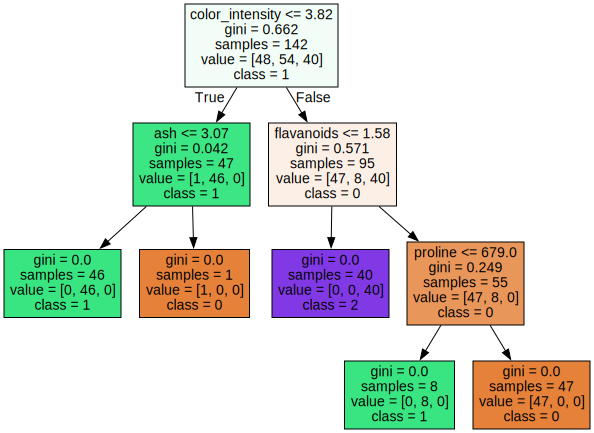

In [5]:
# Visualising the Decision Tree
feature_names = list(dataset['feature_names'])
class_labels = ['0', '1', '2']

graph = Source(export_graphviz(model, out_file=None
   , feature_names=feature_names, class_names=['0', '1', '2'] 
   , filled = True))

graph_svg = SVG(graph.pipe(format='svg'))
display(graph_svg)

### Random Forest

In [6]:
# Instantiating model
model = RandomForestClassifier(n_estimators=100)

# Hold-out validation - default 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Printing out confusion matrix and accuracy
print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))

[[12  0  0]
 [ 0 13  0]
 [ 0  0 11]]

Accuracy (Testing):  1.00 


## K-fold cross-validation

Three different ways of doing this with Scikit-Learn!

### K-NN

This example uses the simplest sklearn function ``cross_val_score``, which only captures accuracy from each fold.

In [9]:
# Instantiating model
model = KNeighborsClassifier(n_neighbors=3)

# cross-validation of the model
scores = cross_val_score(model, X, y, cv=10)

# Printing results
print("Accuracy:  %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy:  0.72 (+/- 0.18)


### Decision Tree

This example uses the ``cross_validate`` function, which gives a lot more measurements (training + test performance) and allows for configuration of using multiple metrics.

In [15]:
# Instantiating model
model = DecisionTreeClassifier()

# defining multiple metrics for scoring
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'prec_macro': make_scorer(precision_score, average='macro', zero_division=0), 
    'rec_macro': make_scorer(recall_score, average='macro', zero_division=0)
}

# cross-validation of the model
scores = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=True, return_estimator=True)

# Printing results
print("Accuracy:  %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores['test_prec_macro'].mean(), scores['test_prec_macro'].std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (scores['test_rec_macro'].mean(), scores['test_rec_macro'].std() * 2))

Accuracy:  0.87 (+/- 0.18)
Precision: 0.89 (+/- 0.13)
Recall:    0.87 (+/- 0.17)


### Random Forest

Finally, a bit more code this way, but allows us to do things for each fold, like capturing confusion matrices. This uses ``StratifiedKFold`` from sklearn. It would be the same principle for using ``KFold``, but the ``StratifiedKFold`` function would ensure the class balance is the same in each fold.

In [24]:
# Instantiating model
model = RandomForestClassifier(n_estimators=20)

# arrays for storing performance metrics; accuracy, precision and recall
acc_list = np.array([])
prec_list = np.array([])
rec_list = np.array([])

# arrays for storing the test data + predictions 
# this will allow us to do a confusion matrix based on all folds in the end
y_test_aggregated = np.array([])
y_pred_aggregated = np.array([])

# creating/setting up the folds
cv = StratifiedKFold(n_splits=10)
cv.get_n_splits(X, y)

# cross-validation of the model
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    # Printing out progress (which fold it is)
    print(f">>> Fold {i}..")

    # Getting data for each fold (as the above returns the indices of the data points selected for training and testing)
    X_train, y_train, X_test, y_test = X[train_index], y[train_index], X[test_index], y[test_index]
    
    # Training the model
    model.fit(X_train, y_train)
    
    # Testing the model
    y_pred = model.predict(X_test)
    
    # Appending performance metrics to arrays created above
    acc_list = np.append(acc_list, accuracy_score(y_test, y_pred))
    prec_list = np.append(prec_list, precision_score(y_test, y_pred, average='macro'))
    rec_list = np.append(rec_list, recall_score(y_test, y_pred, average='macro'))

    # Appending the test data and predictions to do an aggregated confusion matrix at the end
    y_test_aggregated = np.append(y_test_aggregated, y_test)
    y_pred_aggregated = np.append(y_pred_aggregated, y_pred)
    
    # Printing out confusion matrix and accuracy
    print("\nAccuracy (Testing):  %0.2f \n" % (metrics.accuracy_score(y_test, y_pred)))
    print(metrics.confusion_matrix(y_test, y_pred))
    print()


# Printing results
print("\n>>> Average performance stats (from all folds)\n")
print("Accuracy:  %0.2f (+/- %0.2f)" % (acc_list.mean(), acc_list.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (prec_list.mean(), prec_list.std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (rec_list.mean(), rec_list.std() * 2))
print()
print(metrics.confusion_matrix(y_test_aggregated, y_pred_aggregated))

>>> Fold 0..

Accuracy (Testing):  1.00 

[[6 0 0]
 [0 7 0]
 [0 0 5]]

>>> Fold 1..

Accuracy (Testing):  1.00 

[[6 0 0]
 [0 7 0]
 [0 0 5]]

>>> Fold 2..

Accuracy (Testing):  0.89 

[[6 0 0]
 [1 6 0]
 [0 1 4]]

>>> Fold 3..

Accuracy (Testing):  0.94 

[[6 0 0]
 [0 6 1]
 [0 0 5]]

>>> Fold 4..

Accuracy (Testing):  1.00 

[[6 0 0]
 [0 7 0]
 [0 0 5]]

>>> Fold 5..

Accuracy (Testing):  1.00 

[[6 0 0]
 [0 7 0]
 [0 0 5]]

>>> Fold 6..

Accuracy (Testing):  1.00 

[[6 0 0]
 [0 7 0]
 [0 0 5]]

>>> Fold 7..

Accuracy (Testing):  0.94 

[[5 1 0]
 [0 7 0]
 [0 0 5]]

>>> Fold 8..

Accuracy (Testing):  1.00 

[[6 0 0]
 [0 7 0]
 [0 0 4]]

>>> Fold 9..

Accuracy (Testing):  1.00 

[[5 0 0]
 [0 8 0]
 [0 0 4]]


>>> Average performance stats (from all folds)

Accuracy:  0.98 (+/- 0.07)
Precision: 0.98 (+/- 0.06)
Recall:    0.98 (+/- 0.07)

[[58  1  0]
 [ 1 69  1]
 [ 0  1 47]]


## Multiple runs of hold-out validation

Using some utility functions here too, to keep the amount of code in the cells training and testing each model down.

### Utility functions

These are modified functions from the regression lab, to validate the models.

In [ ]:
def validate_model(X, y, model, num_runs=1000, test_size=0.2, output=True):
    """
    Performs hold-out validation of a given model on the dataset provided (X, y).
    The default number of runs is 1000, and the default training/test split is 80/20.
    """
    
    # arrays for storing performance metrics; accuracy, precision and recall
    acc_list = np.array([])
    prec_list = np.array([])
    rec_list = np.array([])

    # capturing the start-time
    start_time = time()

    if output:
        print("Starting model validation")
    
    # runing `num_runs` number of validation runs of data splitting, training and testing
    for x in range(num_runs):
        # Hold-out validation - default 80% training and 20% testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=None)

        # Training and testing the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Appending performance metrics to arrays created above
        acc_list = np.append(acc_list, accuracy_score(y_test, y_pred))
        prec_list = np.append(prec_list, precision_score(y_test, y_pred, average='macro'))
        rec_list = np.append(rec_list, recall_score(y_test, y_pred, average='macro'))

    # capturing the end-time and printing out
    end_time = time()
    
    if output:
        print("Completed %d validation runs in %.2f seconds\n" % (num_runs, end_time - start_time))
    
    return acc_list, prec_list, rec_list

In [ ]:
result_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall'])

def add_result(model_name, acc_list, prec_list, rec_list):
    """
    Add a result row to a pandas dataframe (created above) for a model with name (model_name).
    mse_list, mae_list and me_list are array lists of performance results from different hold-out validation runs,
    coming from the validate_model() function, above.
    """
    global result_df # doing this to be able to access the gloval dataframe defined above the function
    
    new_row = {'Model':model_name, 'Accuracy':acc_list.mean(), 'Precision':prec_list.mean(), 'Recall':rec_list.mean()}
    result_df = pd.concat([result_df, pd.Series(new_row).to_frame().T])
    
    return result_df

def print_results(acc_list, prec_list, rec_list):
    """
    Prints out the mean ACCURACY, PRECISION and RECALL + 2 x standard deviation (STD).
    We multiply the STD by 2 because 95% of the data around the mean is within 2 standard deviations, 
    so it gives us a good idea of the range of values around the mean.
    """
    print("ACC:   %0.2f (+/- %0.2f)" % (acc_list.mean(), acc_list.std() * 2))
    print("PREC:  %0.2f (+/- %0.2f)" % (prec_list.mean(), prec_list.std() * 2))
    print("REC:   %0.2f (+/- %0.2f)" % (rec_list.mean(), rec_list.std() * 2))

def clear_results():
    """
    Clears the result dataframe.
    """
    global result_df
    result_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall'])

In [ ]:
# Sets the number of runs of hold-out validation below (from which we get mean and stdev statistics)
# PS: setting this here, so that we have just a single place to change this, instead of in 10+ function calls further below
num_runs = 100

### K-NN

In [ ]:
# Instantiating model
model = KNeighborsClassifier(n_neighbors=3)

# arrays for storing performance metrics
acc_list, prec_list, rec_list = validate_model(X, y, model, num_runs)

# save the result
add_result('K-NN', acc_list, prec_list, rec_list)

# printing out the performance metrics
print_results(acc_list, prec_list, rec_list)

### Decision Tree

In [ ]:
# Instantiating model
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')

# arrays for storing performance metrics
acc_list, prec_list, rec_list = validate_model(X, y, model, num_runs)

# save the result
add_result('DT', acc_list, prec_list, rec_list)

# printing out the performance metrics
print_results(acc_list, prec_list, rec_list)

### Random Forest

In [ ]:
# Instantiating model
model = RandomForestClassifier(n_estimators=20)

# arrays for storing performance metrics
acc_list, prec_list, rec_list = validate_model(X, y, model, num_runs)

# save the result
add_result('RF', acc_list, prec_list, rec_list)

# printing out the performance metrics
print_results(acc_list, prec_list, rec_list)

### Logistic Regression

**PS**: this is the classifier used in the assignment notebooks.

In [ ]:
# Instantiating model
model = LogisticRegression(max_iter=5000)

# arrays for storing performance metrics
acc_list, prec_list, rec_list = validate_model(X, y, model, num_runs)

# save the result
add_result('LR', acc_list, prec_list, rec_list)

# printing out the performance metrics
print_results(acc_list, prec_list, rec_list)

### Comparison of results

In [ ]:
# Printing out the results table, ordered by Accuracy
result_df.sort_values(by=['Accuracy'], ascending=False).style.hide(axis="index")

## Further automation

Even with the use of the functions, you can see that for each of the cells above, when we train and test the K-NN, DT, RF and LR models, all the code is still repeated, except for the model instantiation.

So, here, we see an example of automating it all with a script, starting with setting up our models.

### Using hold-out validation functions

In [ ]:
# Instantiating models
models = {}
models["K-NN"] = KNeighborsClassifier(n_neighbors=3)
models["DT"] = DecisionTreeClassifier(max_depth=4, criterion='entropy')
models["RF"] = RandomForestClassifier(n_estimators=20)
models["LR"] = LogisticRegression(max_iter=5000)

# Clear the results generated above
clear_results()

# Iterate over all models
for name, model in models.items():
    # arrays for storing performance metrics
    acc_list, prec_list, rec_list = validate_model(X, y, model, num_runs, output=False)
    
    # save the result
    add_result(name, acc_list, prec_list, rec_list)

# Printing out the results table, ordered by Accuracy
result_df.sort_values(by=['Accuracy'], ascending=False).style.hide(axis="index")

### Using cross-validation

In [ ]:
# Instantiating models
models = {}
models["K-NN"] = KNeighborsClassifier(n_neighbors=3)
models["DT"] = DecisionTreeClassifier(max_depth=4, criterion='entropy')
models["RF"] = RandomForestClassifier(n_estimators=20)
models["LR"] = LogisticRegression(max_iter=5000)

# Clear the results generated above
clear_results()

# defining multiple metrics for scoring
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'prec_macro': make_scorer(precision_score, average='macro', zero_division=0), 
    'rec_macro': make_scorer(recall_score, average='macro', zero_division=0)
}

# Iterate over all models
for name, model in models.items():
    # 10-fold cross validation
    scores = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=True, return_estimator=True)

    # save the result
    add_result(name, scores['test_accuracy'], scores['test_prec_macro'], scores['test_rec_macro'])

# Printing out the results table, ordered by Accuracy
result_df.sort_values(by=['Accuracy'], ascending=False).style.hide(axis="index")